<a href="https://colab.research.google.com/github/alveslore/high-cholesterol-and-heart-failure/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O colesterol total acima da meta tem relação com Insuficiência Cardíaca?**

A **insuficiência cardíaca** é uma condição em que o coração não consegue bombear sangue de forma eficiente, causando sintomas como falta de ar, inchaço e cansaço. Ela pode ser controlada com medicamentos, mudanças no estilo de vida e, em casos graves, dispositivos ou cirurgias.

O **colesterol alto** está diretamente relacionado à insuficiência cardíaca, pois níveis elevados de LDL ("ruim") levam ao acúmulo de placas de gordura nas artérias (aterosclerose), dificultando o fluxo de sangue e enfraquecendo o coração. Também está associado à inflamação e estresse oxidativo, que agravam o risco cardiovascular.

Para **prevenir problemas cardíacos**, é essencial manter o colesterol total abaixo de 190 mg/dL, LDL abaixo de 100 mg/dL (ou 70 mg/dL para alto risco) e HDL acima de 40 mg/dL (homens) ou 50 mg/dL (mulheres).


Enquanto estudava sobre insuficiência cardíaca, tive a ideia de treinar minhas habilidades em análises estatísticas usando Python. Decidi investigar se níveis de colesterol acima das metas estabelecidas têm uma relação estatística com a presença de insuficiência cardíaca. Para isso, utilizei o dataset **Heart Disease** disponível no Kaggle e explorei os dados para chegar a algumas respostas. Foi uma ótima oportunidade de unir aprendizado técnico com um tema importante na área de saúde! :)

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Iniciei explorando e analisando esse dataset:

In [ ]:
df = pd.read_csv(f'heartv1.csv')
print(df.head())
print(df.info())

      sex  age  cp  resting_BP  chol  fbs  restecg  thalach   exang  oldpeak  \
0    male   65   0         130   254    0        0       147      0      1.4   
1    male   53   0         140   261    0        0       186      1      0.0   
2    male   50   0         122   222    0        0       186      0      0.0   
3  female   47   1         112   160    0        1       138      0      0.0   
4    male   47   0         142   309    0        0       147      1      0.0   

   slope  ca  thal  Max Heart Rate Reserve  Heart Disease Risk Score  target  
0      1   1     3                      10                     11.44       0  
1      2   0     2                     -17                     13.51       1  
2      2   0     2                     -14                      9.46       1  
3      1   0     2                      37                      8.34       1  
4      1   3     3                      28                     13.43       0  
<class 'pandas.core.frame.DataFrame'>
RangeIn

Em seguida, examinei a distribuição de pessoas com doença cardíaca, além de analisar a idade dos pacientes e os níveis de colesterol.

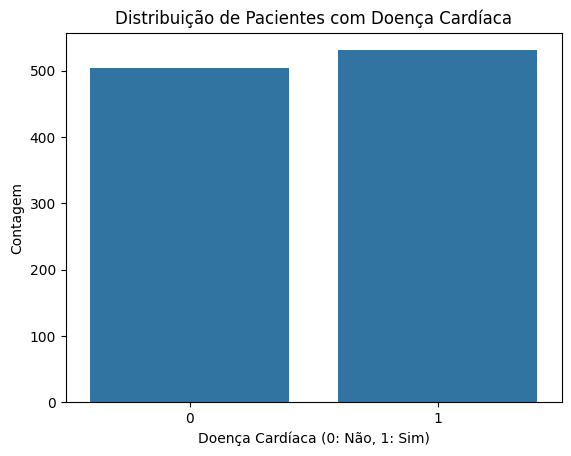

In [ ]:
sns.countplot(data=df, x='target')
plt.title('Distribuição de Pacientes com Doença Cardíaca')
plt.xlabel('Doença Cardíaca (0: Não, 1: Sim)')
plt.ylabel('Contagem')
plt.show()

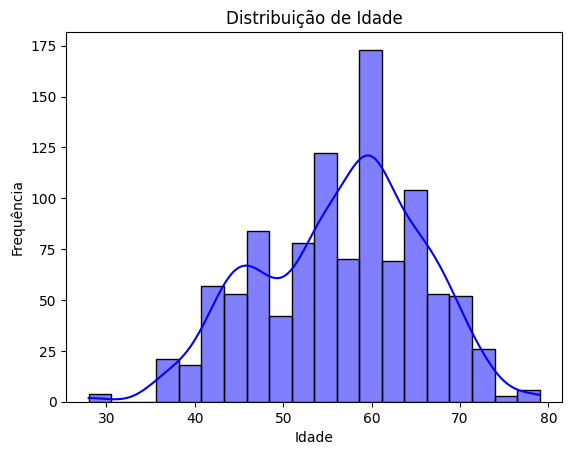

In [ ]:
sns.histplot(data=df, x='age', kde=True, color='blue')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

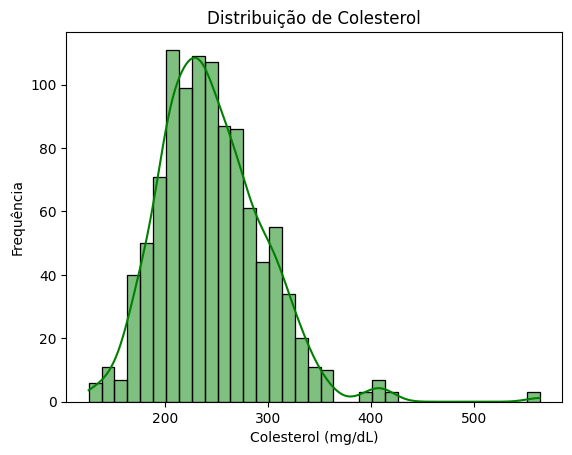

In [ ]:
sns.histplot(data=df, x='chol', kde=True, color='green')
plt.title('Distribuição de Colesterol')
plt.xlabel('Colesterol (mg/dL)')
plt.ylabel('Frequência')
plt.show()

Também **criei uma nova coluna para identificar os pacientes com colesterol alto**. Como eu não sabia se os valores de colesterol no dataset se referiam ao total ou apenas ao LDL, observei que não havia ninguém com colesterol abaixo de 130 e, por isso, presumi que os valores representavam o colesterol total.

<ipython-input-11-1e8173990134>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='colesterol_alto', palette='coolwarm')


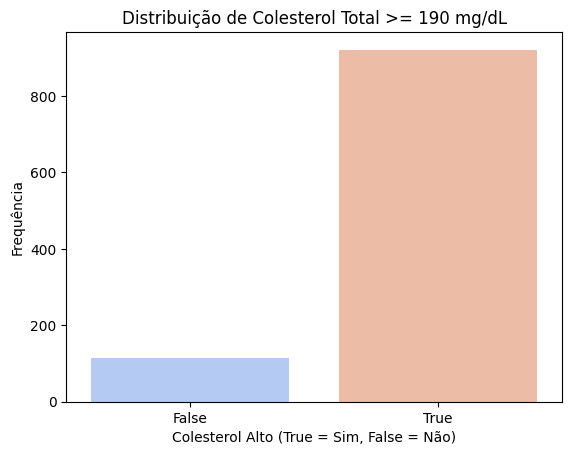

In [ ]:
df['colesterol_alto'] = df['chol'] >= 190
sns.countplot(data=df, x='colesterol_alto', palette='coolwarm')
plt.title('Distribuição de Colesterol Total >= 190 mg/dL')
plt.xlabel('Colesterol Alto (True = Sim, False = Não)')
plt.ylabel('Frequência')
plt.show()



Realizei o teste do qui-quadrado porque queria avaliar se havia uma relação estatística significativa entre os níveis de colesterol alto (acima de 190) e a presença de doença cardíaca. Como ambas as variáveis são categóricas — uma indicando se o colesterol está alto (True/False) e a outra mostrando a presença ou ausência de doença cardíaca (0/1) — o teste do qui-quadrado é ideal para identificar associações em tabelas de contingência. Ele permite determinar se a diferença nas frequências observadas entre os grupos é maior do que seria esperado por acaso.

In [ ]:
contingency_table = pd.crosstab(df['colesterol_alto'], df['target'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Existe uma associação significativa entre colesterol > 190 e doença cardíaca.")
else:
    print("Não há associação significativa entre colesterol > 190 e doença cardíaca.")


Chi-squared: 0.15577875852677533
P-value: 0.6930730278970442
Não há associação significativa entre colesterol > 190 e doença cardíaca.


O resultado mostrou que, estatisticamente, não havia uma relação significativa entre colesterol alto e a presença de doença cardíaca no dataset que analisei. Mas calma lá, isso não é motivo para sair comemorando e comer um McDonald’s! 😅 Às vezes, os resultados de análises podem divergir da literatura por vários motivos, como o tamanho da amostra, a representatividade dos dados ou até a abordagem utilizada. Além disso, vale lembrar que isso não é uma pesquisa científica completa, foi só uma forma de eu praticar minhas habilidades em Python e análise estatística. Então, melhor seguir as recomendações médicas sobre colesterol, ok? 😊